<br>
<div style = 'background: linear-gradient(133deg, rgba(255,162,162,1) 0%, rgba(193,188,32,1) 36%, rgba(103,210,146,1) 67%, rgba(0,212,255,1) 100%); color: white; height:150px; width: 100%;padding:45px 0px 0px 50px; text-align: center;border-radius: 150px'>
<h1> Classifying Apple Leaves' Health Using Convolutional Neural Networks</h1>
</div>


<center><h2> Resource Import </h2></center>
<br>


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sb
import cv2
import matplotlib.pyplot as plt
from glob import glob
import warnings
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Layer
from tensorflow.keras import layers
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow import keras
from sklearn.linear_model import SGDClassifier, LogisticRegression, PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import LabelBinarizer
from visualkeras import layered_view
from ann_visualizer.visualize import ann_viz
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
warnings.filterwarnings('ignore')

<center><h2> Data Collection </h2></center>
<br>


In [3]:
image_size = 224

apple_blackrot = glob('./Images/apple_Black_rot/*')
apple_healthy = glob('./Images/apple_healthy/*')

blackrot_img = []
healthy_img = []

for i in range(len(apple_blackrot)):
    img = cv2.imread(apple_blackrot[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (image_size, image_size))
    blackrot_img.append(img)

for i in range(len(apple_healthy)):
    img2 = cv2.imread(apple_healthy[i])
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    img2 = cv2.resize(img2, (image_size, image_size))
    healthy_img.append(img2)
    
blackrot_img = np.array(blackrot_img)
healthy_img = np.array(healthy_img)

healthy_img[0]

array([[[143, 136, 169],
        [148, 141, 174],
        [147, 140, 173],
        ...,
        [151, 141, 175],
        [151, 141, 175],
        [141, 131, 165]],

       [[143, 136, 169],
        [145, 138, 171],
        [141, 134, 167],
        ...,
        [148, 138, 172],
        [152, 142, 176],
        [152, 142, 176]],

       [[150, 143, 176],
        [147, 140, 173],
        [141, 134, 167],
        ...,
        [147, 137, 171],
        [148, 138, 172],
        [154, 144, 178]],

       ...,

       [[180, 176, 209],
        [180, 176, 209],
        [181, 177, 210],
        ...,
        [159, 152, 185],
        [159, 152, 185],
        [159, 152, 185]],

       [[180, 176, 209],
        [180, 176, 209],
        [181, 177, 210],
        ...,
        [160, 153, 187],
        [161, 154, 187],
        [161, 154, 187]],

       [[180, 176, 209],
        [180, 176, 209],
        [181, 177, 210],
        ...,
        [161, 154, 188],
        [162, 155, 188],
        [163, 156, 189]]

<center><h2> Data Preprocessing </h2><center>
<br>
<hr>

In [4]:
blackrot_img.shape, healthy_img.shape

((410, 224, 224, 3), (410, 224, 224, 3))

In [5]:
len(blackrot_img), len(healthy_img)

(410, 410)

<h3> Data Augmentation </h3>
<br>

In [ ]:
IMG_SIZE = 224
augmentation = Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255),
  layers.RandomFlip(),
  layers.RandomRotation(factor = 0.5),
    
])

blackrot_img2 = augmentation(blackrot_img)
healthy_img2 = augmentation(healthy_img)
# tf.keras.backend.clear_session()


# from numba import cuda
# device = cuda.get_current_device()
# device.reset()
blackrot_img2.shape, healthy_img2.shape

In [ ]:
fig, ax = plt.subplots(nrows = 5, ncols = 5)
fig.set_size_inches(35,35)
for i in range(5):
    k = i*5
    for j in range(5):
        ax[i][j].imshow(healthy_img2[k+j])
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])

In [ ]:
fig, ax = plt.subplots(nrows = 5, ncols = 5)
fig.set_size_inches(35,35)
for i in range(5):
    k = i*5
    for j in range(5):
        ax[i][j].imshow(blackrot_img2[k+j])
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])

<h3>Image concatenation</h3>
<br>


In [6]:
# healthy_img = np.concatenate([healthy_img, healthy_img2])
# blackrot_img = np.concatenate([blackrot_img, blackrot_img2])
blackrot_labels = ['Blackrot']*len(blackrot_img)
healthy_labels = ['Healthy']*len(healthy_img)
# blackrot_img = np.array(blackrot_img)
# healthy_img = np.array(healthy_img)

In [7]:
healthy_img.shape, blackrot_img.shape

((410, 224, 224, 3), (410, 224, 224, 3))


<h3> Data Normalization </h3>
<br>

Healthy image


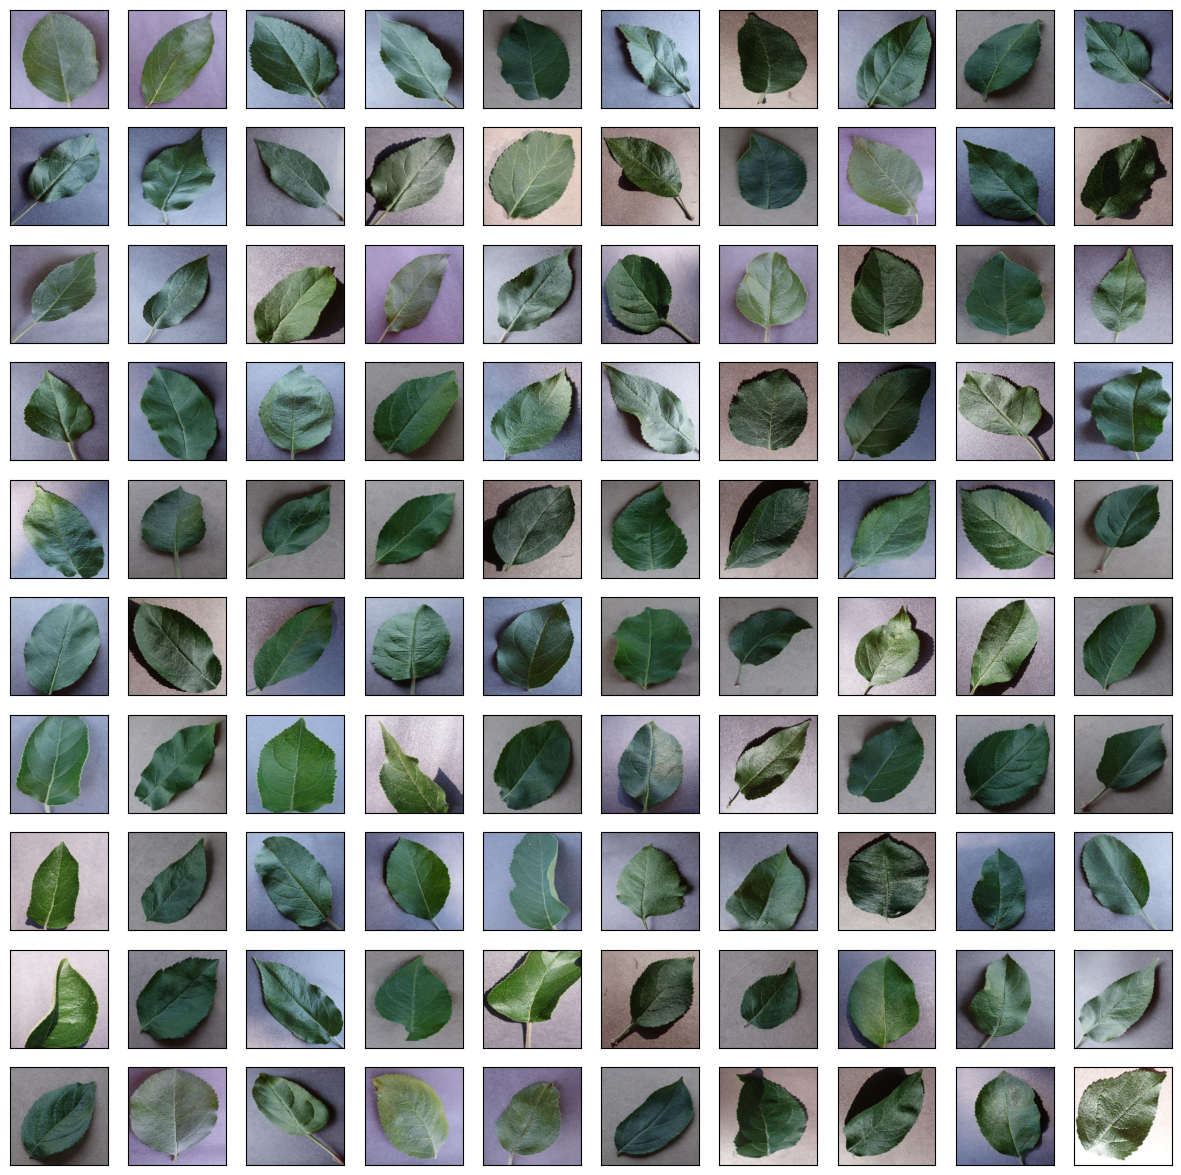

In [8]:
healthy_img = healthy_img/255
fig, ax = plt.subplots(nrows = 10, ncols = 10)
fig.set_size_inches(15,15)
print('Healthy image')
for i in range(10):
    k = i*10
    for j in range(10):
        ax[i][j].imshow(healthy_img[k+j])
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])

Blackrot image


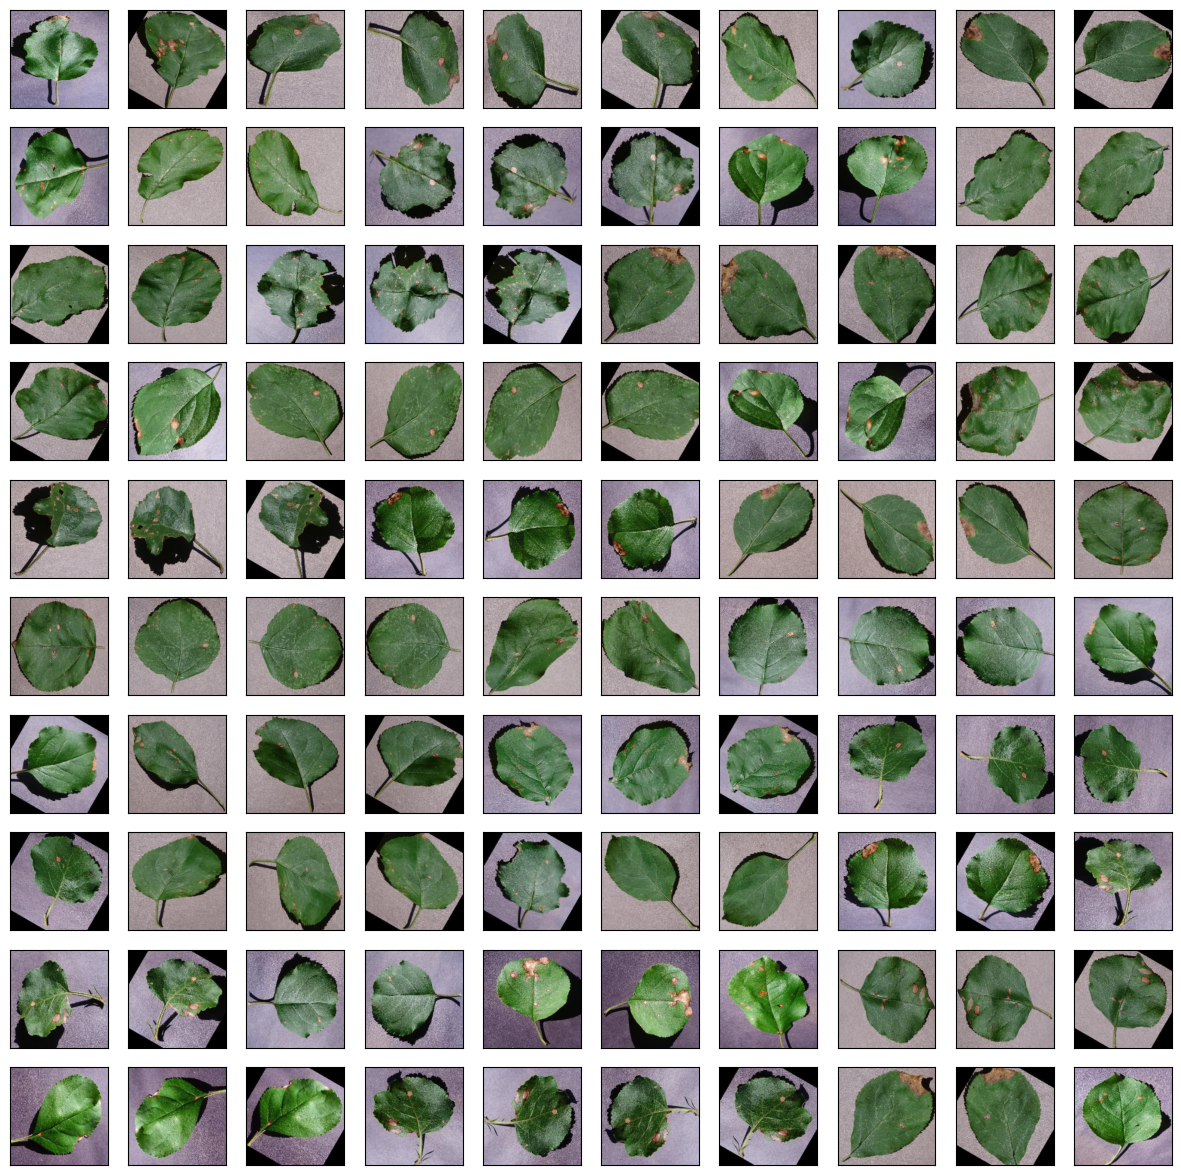

In [9]:
blackrot_img = blackrot_img/255
fig, ax = plt.subplots(nrows = 10, ncols = 10)
fig.set_size_inches(15,15)
print('Blackrot image')
for i in range(10):
    k = i*10
    for j in range(10):
        ax[i][j].imshow(blackrot_img[k+j])
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])

<center><h2> Network Architecture Design </h2></center>
<br>
<hr>

<center><h3> Defined Architecture </h3></center>
<br>

In [ ]:
# using cpu for -1 or gpu for 1
# import os
# os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [ ]:
def vgg16():
    model = Sequential()
    model.add(layers.Conv2D(64, (3,3), strides = 1, padding = 'same', input_shape = (224, 224, 3), activation = 'relu'))
    model.add(layers.Conv2D(64, (3,3), strides = 1, padding = 'same', activation = 'relu'))
    model.add(layers.MaxPool2D(pool_size = (2,2), strides = 2))
    model.add(layers.Conv2D(128, (3, 3), strides = 1, padding = 'same', activation = 'relu'))
    model.add(layers.Conv2D(128, (3, 3), strides = 1, padding = 'same', activation = 'relu'))
    model.add(layers.MaxPool2D(pool_size = (2,2), strides = 2))
    model.add(layers.Conv2D(256, (3, 3), strides = 1, padding = 'same', activation = 'relu'))
    model.add(layers.Conv2D(256, (3, 3), strides = 1, padding = 'same', activation = 'relu'))
    model.add(layers.Conv2D(256, (3, 3), strides = 1, padding = 'same', activation = 'relu'))
    model.add(layers.MaxPool2D(pool_size = (2,2), strides = 2))
    model.add(layers.Conv2D(512, (3, 3), strides = 1, padding = 'same', activation = 'relu'))
    model.add(layers.Conv2D(512, (3, 3), strides = 1, padding = 'same', activation = 'relu'))
    model.add(layers.Conv2D(512, (3, 3), strides = 1, padding = 'same', activation = 'relu'))
    model.add(layers.MaxPool2D(pool_size = (2,2), strides = 2))
    model.add(layers.Conv2D(512, (3, 3), strides = 1, padding = 'same', activation = 'relu'))
    model.add(layers.Conv2D(512, (3, 3), strides = 1, padding = 'same', activation = 'relu'))
    model.add(layers.Conv2D(512, (3, 3), strides = 1, padding = 'same', activation = 'relu'))
    model.add(layers.MaxPool2D(pool_size = (2,2), strides = 2))
    model.add(Flatten())
    model.add(Dense(1024, activation = 'relu'))
    model.add(Dense(1024, activation = 'relu'))
    model.add(Dense(2, activation = 'softmax'))
    model.compile(optimizer='adam', loss=keras.losses.binary_crossentropy, metrics=['accuracy'])
    return model

layered_view(vgg16(), legend = True, scale_xy = 1.5, scale_z = 0.01)

In [ ]:
plot_model(vgg16(),show_shapes = True)

In [ ]:
vgg16().summary()

In [1]:
# ann_viz(vgg16(), title = 'VGG16 architecture', view =True)
# from numba import cuda
# cuda.select_device(0)
# cuda.close()

<br>
<center><h3> Madeup Architecture </h3></center>
<br>

In [ ]:
def custom1():
    model = Sequential()
    model.add(layers.Conv2D(128, (3, 3), strides = 1, padding = 'same', activation = 'relu', input_shape = (224, 224, 3)))#186
    model.add(layers.MaxPool2D(pool_size = (2,2), strides = 2))#93
    model.add(layers.Conv2D(64, (3, 3), strides = 1, padding = 'same', activation = 'relu'))#39
    model.add(layers.MaxPool2D(pool_size = (2,2), strides = 2)) #20
    model.add(layers.Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(2, activation = 'sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model
layered_view(custom1(), legend = True, scale_xy = 1.5, scale_z = 1)

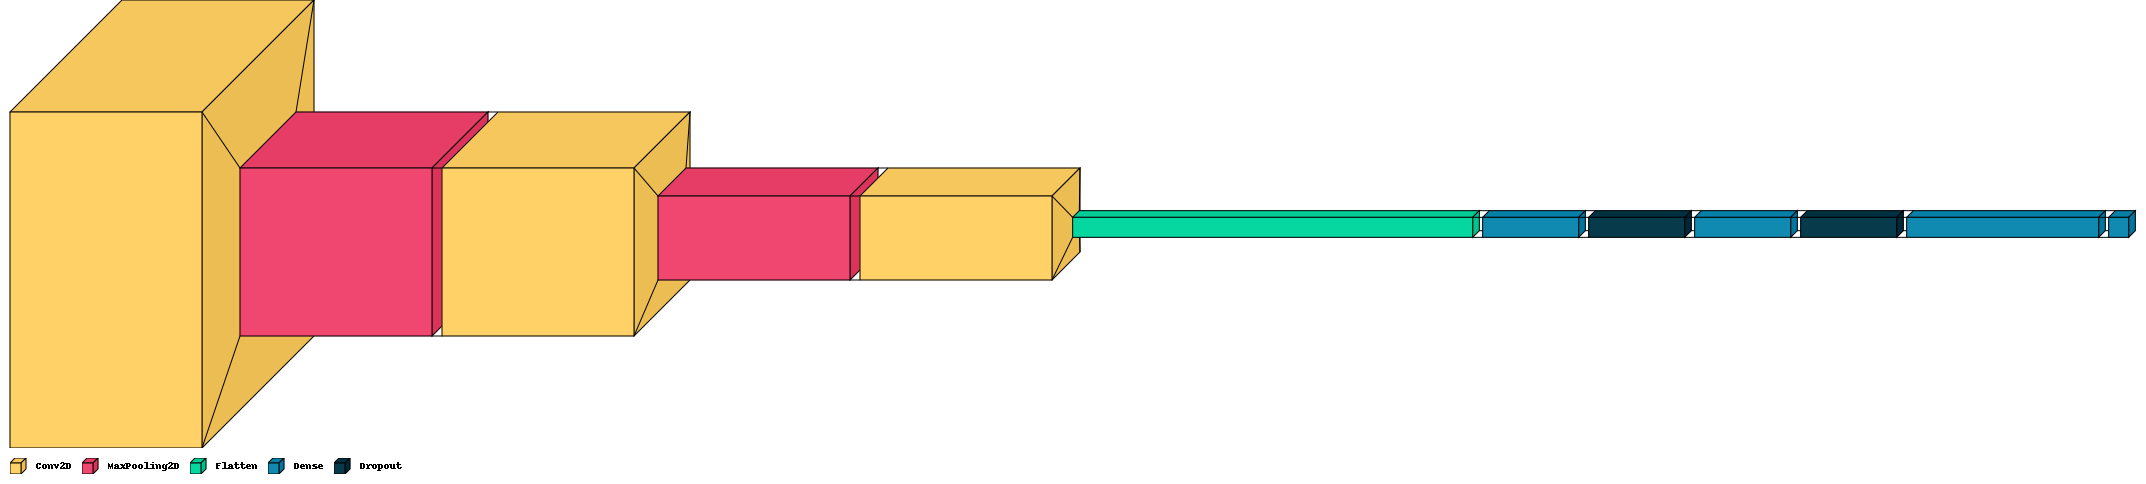

In [10]:
def custom2():
    model = Sequential()
    model.add(layers.Conv2D(128, (3, 3), strides = 1, padding = 'same', activation='relu', input_shape=(224, 224, 3)))
    model.add(layers.MaxPooling2D(pool_size = (2, 2), strides = 2))
    model.add(layers.Conv2D(128, (3, 3), strides = 1, padding = 'same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size = (2, 2), strides = 2))
    model.add(layers.Conv2D(128, (3, 3), strides = 1, padding = 'same', activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.05))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.05))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(2, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model
layered_view(custom2(), legend = True, scale_xy = 1.5, scale_z = 1.5)

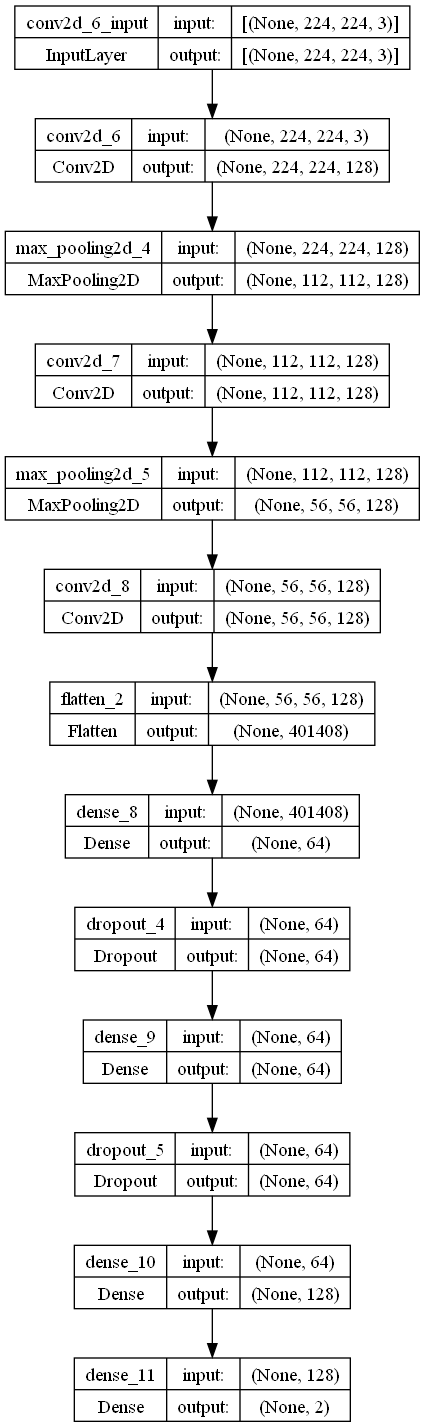

In [15]:
plot_model(custom2(),show_shapes = True)

In [17]:
custom2().summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 224, 224, 128)     3584      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 112, 112, 128)    0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 56, 56, 128)       147584    
                                                                 
 flatten_3 (Flatten)         (None, 401408)           

In [ ]:
def custom3():
    model = Sequential()
    model.add(layers.Conv2D(256, (3, 3), strides = 1, padding = 'same', activation='relu', input_shape=(224, 224, 3)))
    model.add(layers.MaxPooling2D(pool_size = (2, 2), strides = 2))
    model.add(layers.Conv2D(128, (3, 3), strides = 1, padding = 'same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size = (2, 2), strides = 2))
    model.add(layers.Conv2D(64, (3, 3), strides = 1, padding = 'same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size = (2, 2), strides = 2))
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(2, activation='softmax'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model
layered_view(custom3(), legend = True, scale_xy = 1.5, scale_z = 0.01)

In [ ]:
def custom4():
    model = Sequential()
    model.add(layers.Conv2D(28, (3, 3), strides = 1, padding = 'same', activation='relu', input_shape = (224, 224, 3)))
    model.add(layers.MaxPooling2D(pool_size = (2, 2)))
    model.add(layers.Conv2D(56, (3, 3), strides = 1, padding = 'same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size = (2, 2), strides = 2))
    model.add(layers.Conv2D(112, (3, 3), strides = 1, padding = 'same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size = (2, 2)))
    model.add(layers.Conv2D(224, (3, 3), strides = 1, padding = 'same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size = (2, 2)))
    model.add(layers.Conv2D(448, (3, 3), strides = 1, padding = 'same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size = (2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(2, activation='softmax'))
    model.compile(optimizer='adam', loss=tf.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
    return model
layered_view(custom4(), legend = True, scale_xy = 1.5, scale_z = 0.01)

<center><h2> Model Building </h2></center>
<br>
<hr>

In [11]:
x = np.concatenate([blackrot_img, healthy_img])
y = blackrot_labels + healthy_labels
y = LabelBinarizer().fit_transform(y)
y = to_categorical(y)
x.shape, y.shape

((820, 224, 224, 3), (820, 2))

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [ ]:
custom1_model = custom1()
custom1_model.fit(x_train, y_train, epochs=10, batch_size=5)

In [13]:
custom2_model = custom2()
custom2_model.fit(x_train, y_train, epochs=10, batch_size=1)

Epoch 1/10
615/615 [==============================] - 27s 29ms/step - loss: 0.6414 - accuracy: 0.7545
Epoch 2/10
615/615 [==============================] - 23s 38ms/step - loss: 0.2557 - accuracy: 0.9154
Epoch 3/10
615/615 [==============================] - 24s 39ms/step - loss: 0.3654 - accuracy: 0.8878
Epoch 4/10
615/615 [==============================] - 30s 49ms/step - loss: 0.2289 - accuracy: 0.9203
Epoch 5/10
615/615 [==============================] - 33s 53ms/step - loss: 0.2188 - accuracy: 0.9480
Epoch 6/10
615/615 [==============================] - 36s 58ms/step - loss: 0.1511 - accuracy: 0.9626
Epoch 7/10
615/615 [==============================] - 37s 60ms/step - loss: 0.2670 - accuracy: 0.9772
Epoch 8/10
615/615 [==============================] - 38s 61ms/step - loss: 0.0261 - accuracy: 0.9935
Epoch 9/10
615/615 [==============================] - 38s 63ms/step - loss: 0.1803 - accuracy: 0.9756
Epoch 10/10
615/615 [==============================] - 38s 62ms/step - loss: 0.109

In [ ]:
custom3_model = custom3()
custom3_model.fit(x_train, y_train, epochs=5, batch_size=1)

In [ ]:
custom4_model = custom4()
custom4_model.fit(x_train, y_train, epochs=5, batch_size=1)

In [ ]:
vgg16_model = vgg16()
vgg16_model.fit(x_train, y_train, epochs=1, batch_size=1)


<center> <h2> Model Evaluation </h2><center>
<br>
<hr>

In [ ]:
custom1_model.evaluate(x_test, y_test, verbose = 1)

In [14]:
custom2_model.evaluate(x_test, y_test, verbose = 1)

7/7 [==============================] - 9s 979ms/step - loss: 0.0748 - accuracy: 0.9756


[0.07483700662851334, 0.9756097793579102]

In [ ]:
custom3_model.evaluate(x_test, y_test, verbose = 1)

In [ ]:
custom4_model.evaluate(x_test, y_test, verbose = 1)

In [ ]:
custom2_model.summary()

In [ ]:
tf.keras.backend.clear_session()